# Decision Tree and Naive Bayes Implementation

### Student Name and ID: Neha Mali Piraji and 1001733478
### Student Name and ID: Pooja Gaurav and 1001415194

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report

#1 Loading adult dataset from train_cl.csv 
# adultData variables contains all the data loaded from csv

adultData = pd.read_csv("train_cl.csv")


In [2]:
#2 Printing top 5 records of the dataset.

adultData.head()

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
0,0,0,0,22.0,7.2500,2,1,0,0,0,...,0,1,1,0,0,0,0,0,0,0
1,1,1,1,38.0,71.2833,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
2,2,1,1,26.0,7.9250,1,1,0,0,1,...,0,1,1,0,0,0,0,0,0,1
3,3,1,1,35.0,53.1000,2,1,0,0,1,...,0,0,1,0,0,0,0,0,0,0
4,4,0,0,35.0,8.0500,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [3]:
#2 Printing last five records of the dataset.

adultData.tail()

,Unnamed: 0,Survived,Sex,Age,Fare,famiy,Embarked_0,AgeGroup_1,AgeGroup_2,AgeGroup_3,...,Pclass_2,Pclass_3,Parch_0,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,isAlone
886,886,0,0,27.000000,13.00,1,1,0,0,0,...,1,0,1,0,0,0,0,0,0,1
887,887,1,1,19.000000,30.00,1,1,0,0,1,...,0,0,1,0,0,0,0,0,0,1
888,888,0,1,29.699118,23.45,4,1,0,0,1,...,0,1,0,0,1,0,0,0,0,0
889,889,1,0,26.000000,30.00,1,1,0,0,0,...,0,0,1,0,0,0,0,0,0,1
890,890,0,0,32.000000,7.75,1,1,0,0,0,...,0,1,1,0,0,0,0,0,0,1


In [4]:
#3 Labels of dataset

# class_labels : Contains the class labels used in dataset

class_labels = adultData.iloc[:,-1:]

In [5]:
#4 Splitting the dataset in - 70% for training, and 30% for testing the classifier.
# X : contains data from column 1 to second last, except the class column
# Y : contains the target value, last column of dataset

from sklearn.model_selection import train_test_split 

X = adultData.iloc[:, 1:28 ]   
Y = adultData.iloc[:,-1:]

x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.30)


## DECISION TREE

In [6]:
# 1  Calculating quality of the split using gini value and entropy value

from sklearn.metrics import confusion_matrix 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.metrics import accuracy_score 
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

def gini_func(x_train, x_test, y_train): 
  
    # Creating the gini classifier : giniClassifier
    giniClassifier = DecisionTreeClassifier(criterion = "gini", 
            random_state = 100,max_depth=3, min_samples_leaf=5) 
  
    # Performing training 
    giniClassifier.fit(x_train, y_train) 
    return giniClassifier 



def entropy_func(x_train, x_test, y_train): 
  
     # Creating the etropy  classifier :  entropyClassifier
    
    entropyClassifier = DecisionTreeClassifier( 
            criterion = "entropy", random_state = 100, 
            max_depth = 3, min_samples_leaf = 5) 
  
    # Performing training 
    entropyClassifier.fit(x_train, y_train) 
    return entropyClassifier 
  
  
    # Predicting data based on the classifier passed in funtion
def prediction(x_test, clf_object): 
  
    # Predicton on test with giniIndex 
    y_pred = clf_object.predict(x_test) 
    print("Predicted values:") 
    print(y_pred) 
    return y_pred 

      
# 3 Calculating and printing the confusion matrix, and the classification Report 
# (includes: precision, recall, f1-score and support).

def cal_accuracy(y_test, y_pred): 
      
    print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_pred)) 
      
    print ("Accuracy : ", 
    accuracy_score(y_test,y_pred)*100) 
      
    print("Report : ", 
    classification_report(y_test, y_pred)) 
  

def main():
    giniClassifier = gini_func(x_train, x_test, y_train) 
    entropyClassifier = entropy_func(x_train, x_test, y_train) 
      
    # Operational Phase 
    print("Results Using Gini Index:") 
      
    # Prediction using gini 
    y_pred_gini = prediction(x_test, giniClassifier) 
    cal_accuracy(y_test, y_pred_gini) 
      
    print("Results Using Entropy:") 
    # Prediction using entropy 
    y_pred_entropy = prediction(x_test, entropyClassifier) 
    cal_accuracy(y_test, y_pred_entropy) 
      
      
    # Calling main function 
if __name__=="__main__": 
    main()
  

Results Using Gini Index:
Predicted values:
[1 1 0 0 1 1 1 0 1 1 0 1 0 0 0 1 1 1 1 0 1 0 1 1 0 1 1 0 0 1 0 1 0 1 0 0 1
 1 1 0 0 1 1 1 1 1 0 0 0 1 1 1 1 1 0 1 1 0 0 1 0 1 0 1 0 1 0 1 0 1 0 1 1 0
 1 0 1 1 1 1 1 0 1 1 0 0 0 0 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 0 1 1 1 1 1 0 1
 0 0 0 1 1 1 0 1 0 0 1 1 0 1 0 0 1 1 1 1 0 1 1 1 1 0 0 1 1 0 0 1 0 0 1 1 0
 1 1 0 1 1 1 1 1 0 1 1 0 0 0 1 1 1 0 0 1 1 1 1 0 1 1 0 1 0 0 1 1 1 0 1 1 1
 1 1 1 1 0 0 1 0 1 1 1 1 0 1 0 0 0 0 1 1 0 0 0 1 0 1 0 1 1 1 1 1 0 1 0 1 1
 1 1 0 0 1 1 1 1 1 1 1 0 1 1 1 1 0 0 0 0 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 0
 1 1 0 0 0 0 0 1 1]
Confusion Matrix:  [[101   0]
 [  0 167]]
Accuracy :  100.0
Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       101
           1       1.00      1.00      1.00       167

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268

Results Using 

NameError: name 'tree' is not defined

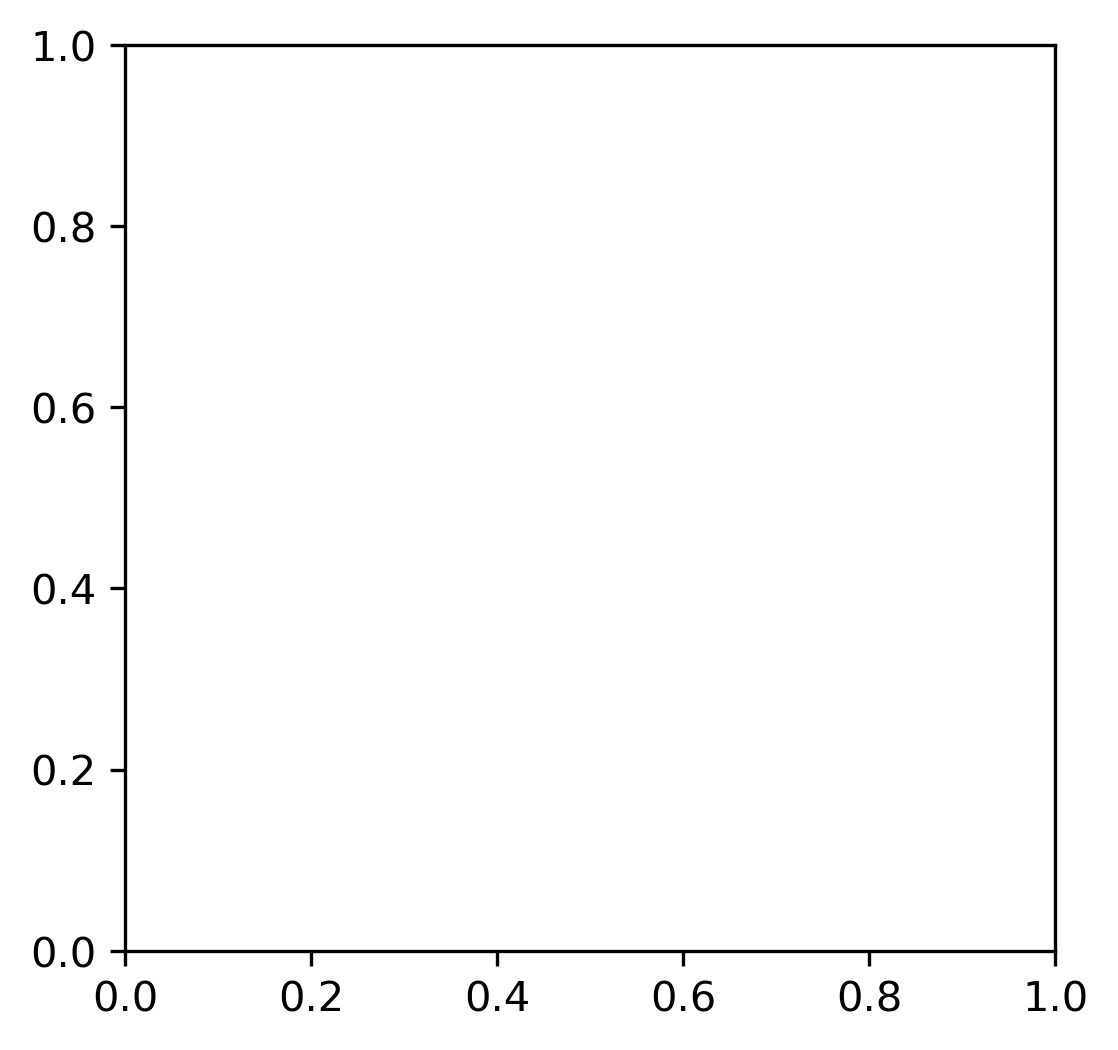

In [8]:
# 4 Decision Tree Visualization
# text_representation : Represts decision tree in textual format
# feature_names : Contains feature names of the data
# class_names: Contains target class names

from matplotlib import pyplot as plt

giniClf = gini_func(x_train, x_test, y_train)

entropyClf = entropy_func(x_train, x_test, y_train)


text_representation = tree.export_text(giniClf)
print(text_representation)

feature_names = adultData.columns
class_names=['0', '1']

# print("======== Visulization based on Gini Classifier=========")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(giniClf,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
fig.savefig('imagename1.png')

# print("======== Visulization based on Entropy Classifier=========")

fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(entropyClf,
               feature_names = feature_names, 
               class_names=class_names,
               filled = True);
fig.savefig('imagename2.png')


In [8]:
# Citation for Decision Tree

# https://www.geeksforgeeks.org/decision-tree-implementation-python/?ref=rp
# https://towardsdatascience.com/visualizing-decision-trees-with-python-scikit-learn-graphviz-matplotlib-1c50b4aa68dc
# https://mljar.com/blog/visualize-decision-tree/

## Naive Bayes Classifier

In [9]:
# Implementing Naive Bayes Classifier to predict test data

from sklearn import metrics
from sklearn.naive_bayes import GaussianNB

#Creating  a Gaussian Classifier : gaussianClf
gaussianClf = GaussianNB()

#Train the model using the training sets
gaussianClf.fit(x_train, y_train.values.ravel())

#Predict the response for test dataset , prediction variable: y_predNB
y_predNB = gaussianClf.predict(x_test)

In [10]:

# Calculating and printing the confusion matrix, and the classification Report 
# (includes: precision, recall, f1-score and support).
# Passing prediction variable : y_predNB and test data: y_test

print("Confusion Matrix: ", 
        confusion_matrix(y_test, y_predNB)) 
      
print ("Naive Bayes Accuracy : ", 
    accuracy_score(y_test,y_predNB)*100) 
      
print("Naive Bayes Report : ", 
    classification_report(y_test, y_predNB)) 

Confusion Matrix:  [[100   0]
 [  0 168]]
Naive Bayes Accuracy :  100.0
Naive Bayes Report :                precision    recall  f1-score   support

           0       1.00      1.00      1.00       100
           1       1.00      1.00      1.00       168

    accuracy                           1.00       268
   macro avg       1.00      1.00      1.00       268
weighted avg       1.00      1.00      1.00       268



In [11]:
# Citation for Naive Bayes

# https://www.datacamp.com/community/tutorials/naive-bayes-scikit-learn
# https://www.geeksforgeeks.org/decision-tree-implementation-python/?ref=rp